In [205]:
import numpy as np
import pandas as pd  
import csv


In [206]:
#load datas set
data_csv = pd.read_csv("C:\\Users\\youssef\\Desktop\\instant_Ai\\datasets\\KaggleV2-May-2016.csv")

show the data frame of the data set:

In [207]:
data_csv.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Drop the columns we not need it in analysis:


In [208]:
data_csv.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],inplace=True)

In [209]:
data_csv.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [210]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   Hipertension  110527 non-null  int64 
 4   Diabetes      110527 non-null  int64 
 5   Alcoholism    110527 non-null  int64 
 6   Handcap       110527 non-null  int64 
 7   SMS_received  110527 non-null  int64 
 8   No-show       110527 non-null  object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [211]:
old=data_csv[(data_csv['Age']>=40)]
print(old.iloc[:,:2])
oldperson=old.iloc[:,:2].count()
print(oldperson)

       Gender  Age
0           F   62
1           M   56
2           F   62
4           F   56
5           F   76
...       ...  ...
110520      F   42
110521      F   53
110522      F   56
110523      F   51
110526      F   54

[51245 rows x 2 columns]
Gender    51245
Age       51245
dtype: int64


#I will remove some columns because they are useless for the prediction :

In [212]:
young=data_csv[(data_csv['Age']<=40)]
print(young.iloc[:,:2])
youngperson=young.iloc[:,:2].count()
print(youngperson)

       Gender  Age
3           F    8
6           F   23
7           F   39
8           F   21
9           F   19
...       ...  ...
110516      F   37
110517      F   19
110519      F   22
110524      F   21
110525      F   38

[60684 rows x 2 columns]
Gender    60684
Age       60684
dtype: int64


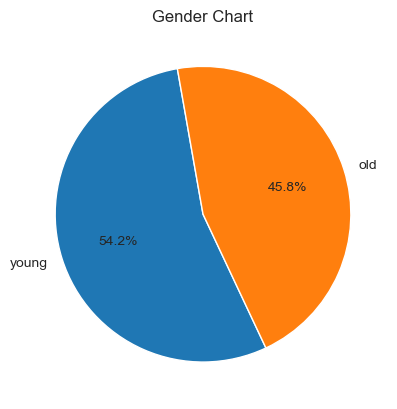

In [213]:
import matplotlib.pyplot as plt
categories = ['young','old']
values = [youngperson[0], oldperson[0]]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=100)
plt.title('Gender Chart')
plt.show()

Now i don't need te age for analysis:

In [214]:
data_csv.drop('Age',axis=1,inplace=True)
data_csv.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,0,1,0,0,0,0,No
1,M,0,0,0,0,0,0,No
2,F,0,0,0,0,0,0,No
3,F,0,0,0,0,0,0,No
4,F,0,1,1,0,0,0,No


In [215]:
import matplotlib.pyplot as plt

Gender
F    71840
M    38687
Name: count, dtype: int64


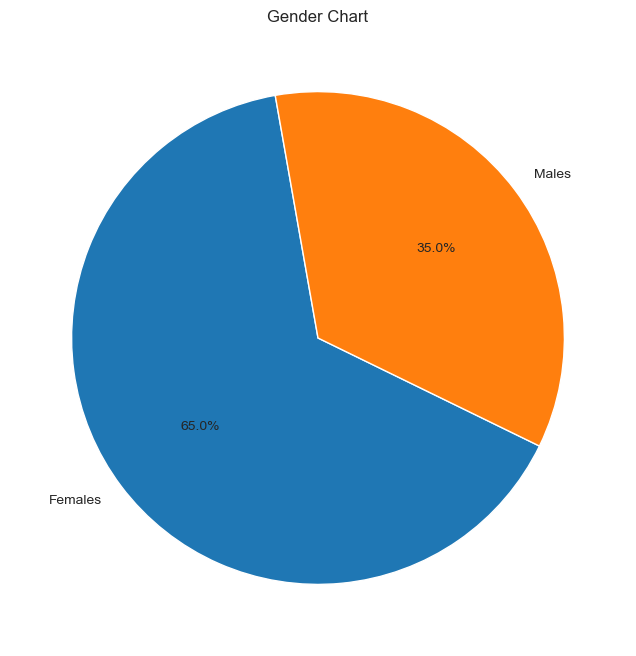

In [216]:
gender=data_csv['Gender'].value_counts()
print(gender)
categories = ['Females','Males']
values = [gender[0], gender[1]]
plt.figure(figsize=(8,8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=100)
plt.title('Gender Chart')
plt.show()

Scholarship
0    99666
1    10861
Name: count, dtype: int64


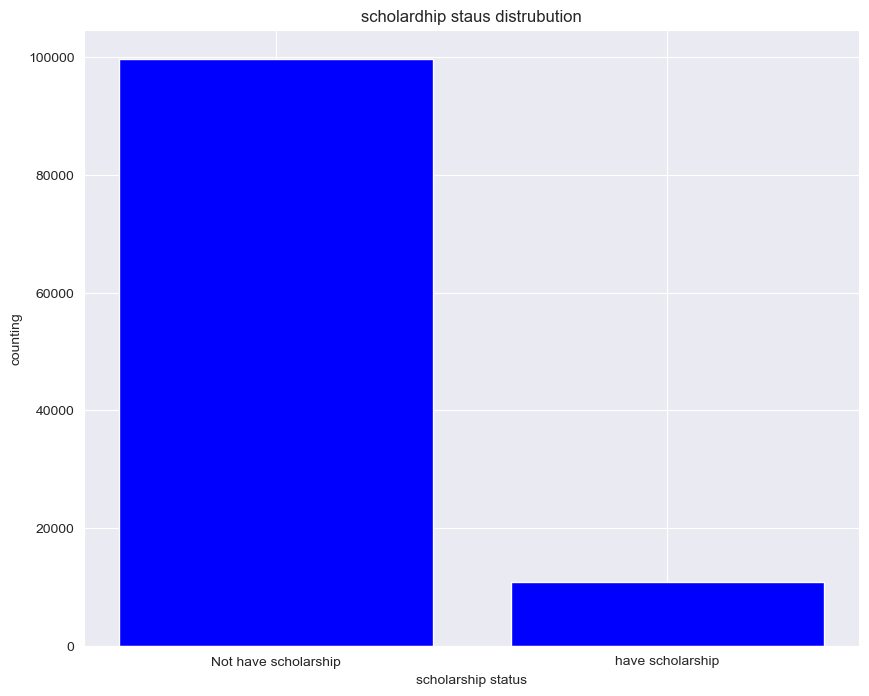

In [217]:
schol = data_csv['Scholarship'].value_counts()
print(schol)
categories = ['Not have scholarship', 'have scholarship']
values = [schol[0], schol[1]]

plt.figure(figsize=(10, 8))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('scholarship status')
plt.ylabel('counting')
plt.title('scholardhip staus distrubution')
# Show the plot
plt.show()

Hipertension
0    88726
1    21801
Name: count, dtype: int64


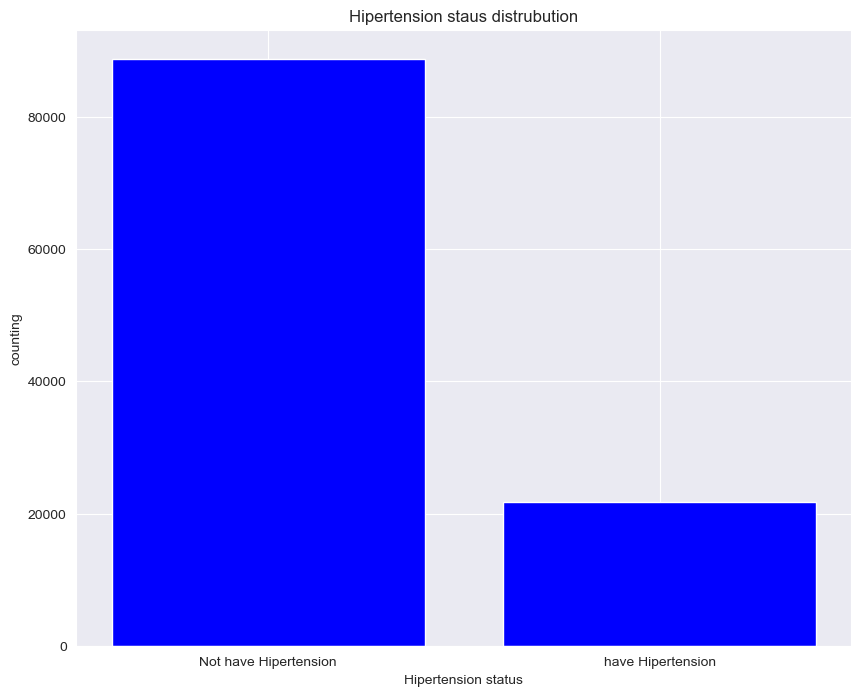

In [218]:
Hipertension=data_csv['Hipertension'].value_counts()
print(Hipertension)
categories = ['Not have Hipertension', 'have Hipertension']
values = [Hipertension[0], Hipertension[1]]
plt.figure(figsize=(10, 8))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Hipertension status')
plt.ylabel('counting')
plt.title('Hipertension staus distrubution')
# Show the plot
plt.show()

Diabetes
0    102584
1      7943
Name: count, dtype: int64


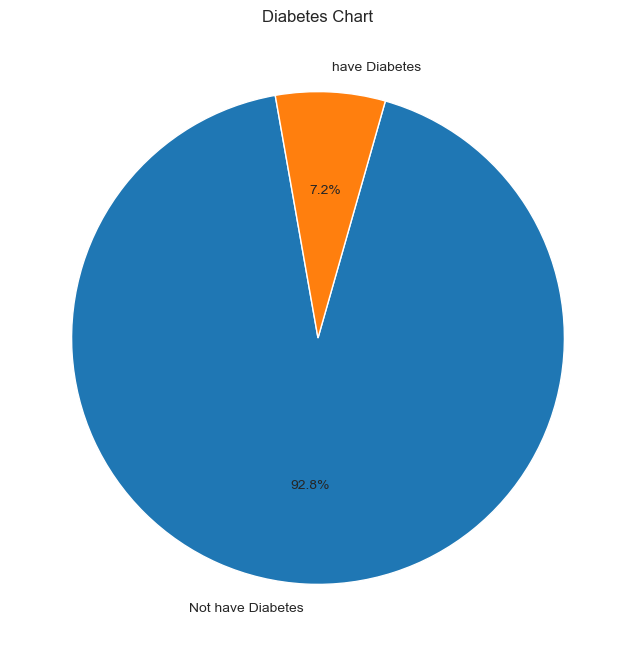

In [219]:
plt.figure(figsize=(8,8))
Diabetes=data_csv['Diabetes'].value_counts()
print(Diabetes)
categories = ['Not have Diabetes', 'have Diabetes']
values = [Diabetes[0], Diabetes[1]]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=100)
plt.title('Diabetes Chart')
plt.show()

Alcoholism
0    107167
1      3360
Name: count, dtype: int64


<Figure size 800x800 with 0 Axes>

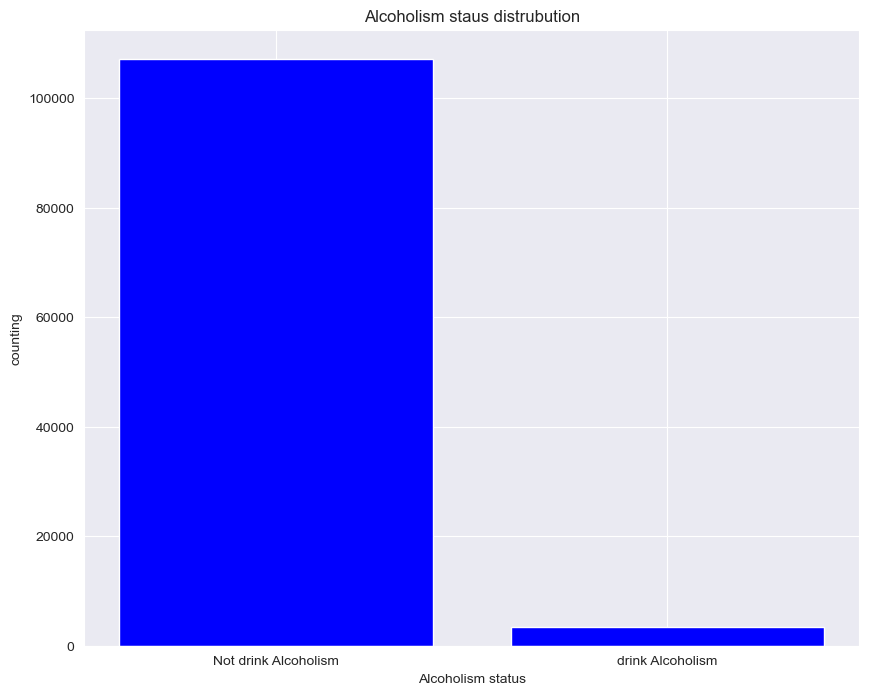

In [220]:
plt.figure(figsize=(8,8))
Alcoholism=data_csv['Alcoholism'].value_counts()
print(Alcoholism)
categories = ['Not drink Alcoholism', 'drink Alcoholism']
values = [Alcoholism[0], Alcoholism[1]]

plt.figure(figsize=(10, 8))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Alcoholism status')
plt.ylabel('counting')
plt.title('Alcoholism staus distrubution')
# Show the plot
plt.show()

In [236]:
data_csv.drop(columns=['Scholarship','Hipertension','Diabetes','Alcoholism'],inplace=True)
data_csv.head()

,Gender,SMS_received,No-show
0,F,0,No
1,M,0,No
2,F,0,No
3,F,0,No
4,F,0,No


In [238]:
Handcap=data_csv['Handcap'].value_counts()
print(Handcap)
categories = ['Not have Handcap', 'have one Handcap','have two handcap','have three handcap','have four handcap']
values = [Handcap[0], Handcap[1],Handcap[2],Handcap[3],Handcap[4]]

# Plotting
Handcap.plot(kind='bar', rot=0, color='skyblue', edgecolor='black')
plt.title('Counts of Handcap Levels')
plt.xlabel('Handcap Levels')
plt.ylabel('Count')

KeyError: 'Handcap'

This column is not useful because many of the people not has handcap we need to drop it


In [237]:
data_csv.drop('Handcap',axis=1,inplace=True)

KeyError: "['Handcap'] not found in axis"

In [223]:
data_csv.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,0,1,0,0,0,No
1,M,0,0,0,0,0,No
2,F,0,0,0,0,0,No
3,F,0,0,0,0,0,No
4,F,0,1,1,0,0,No


SMS_received
0    75045
1    35482
Name: count, dtype: int64


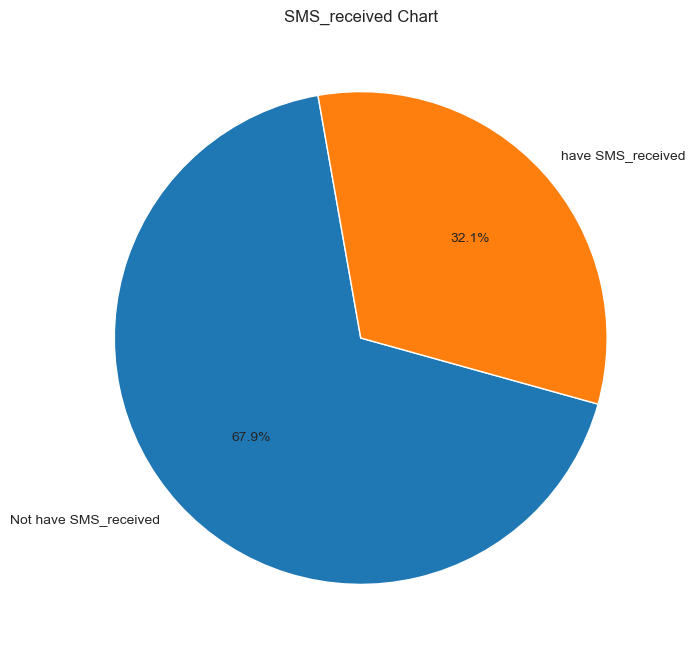

In [224]:
plt.figure(figsize=(8,8))
SMS_received=data_csv['SMS_received'].value_counts()
print(SMS_received)
categories = ['Not have SMS_received', 'have SMS_received']
values = [SMS_received[0], SMS_received[1]]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=100)
plt.title('SMS_received Chart')
plt.show()

No-show
No     88208
Yes    22319
Name: count, dtype: int64


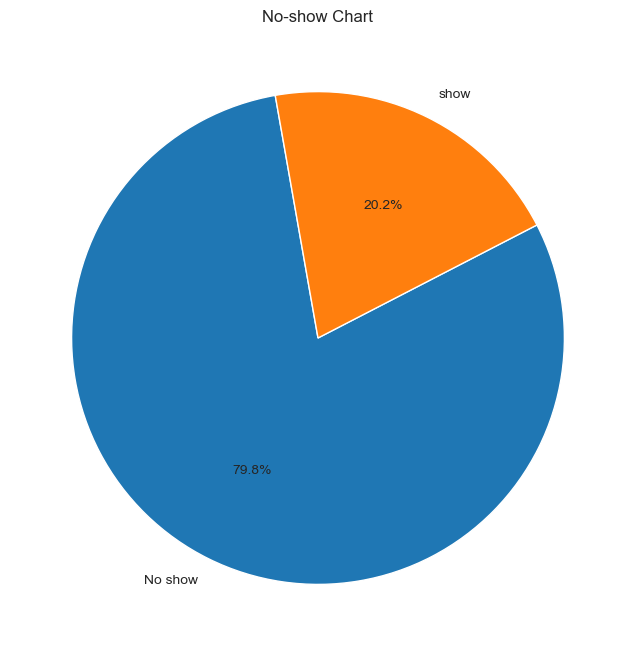

In [225]:
plt.figure(figsize=(8,8))
No_show=data_csv['No-show'].value_counts()
print(No_show)
categories = ['No show', 'show']
values = [No_show[0], No_show[1]]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=100)
plt.title('No-show Chart')
plt.show()

Relation between No-show and each table:

In [226]:
gender_and_noshow=data_csv.iloc[:,[0,6]]
gender_and_noshow.head()

,Gender,No-show
0,F,No
1,M,No
2,F,No
3,F,No
4,F,No


In [227]:
gender_noshow_counts = gender_and_noshow.groupby(['Gender', 'No-show']).size()
print(gender_noshow_counts,'\n')
gender_noshow_counts_df = gender_noshow_counts.reset_index(name='Count')
print(gender_noshow_counts_df)

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64 

  Gender No-show  Count
0      F      No  57246
1      F     Yes  14594
2      M      No  30962
3      M     Yes   7725


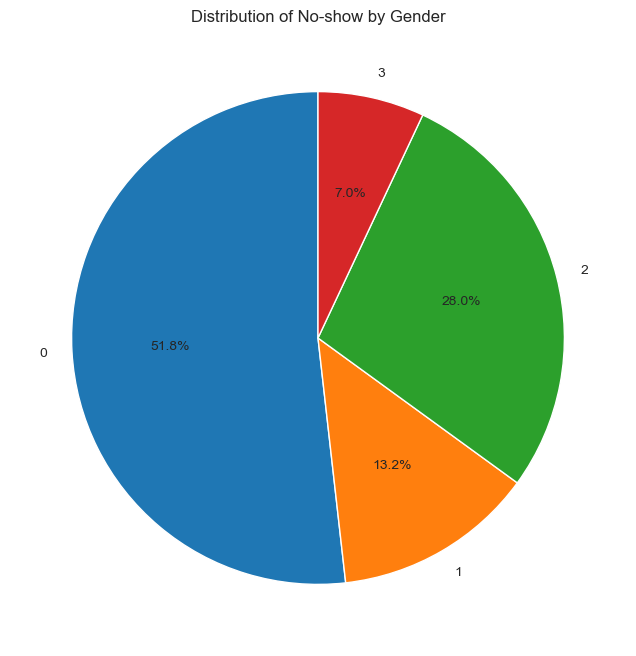

In [250]:
plt.figure(figsize=(8,8))
plt.pie(gender_noshow_counts_df['Count'],labels=gender_noshow_counts_df.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of No-show by Gender')
plt.show()

In [229]:
sms_noshow=sms_and_noshow.groupby(['SMS_received','No-show']).size()
sms_noshow_df=sms_noshow.reset_index(name='counter')
print(sms_noshow_df)

   SMS_received No-show  counter
0             0      No    62510
1             0     Yes    12535
2             1      No    25698
3             1     Yes     9784


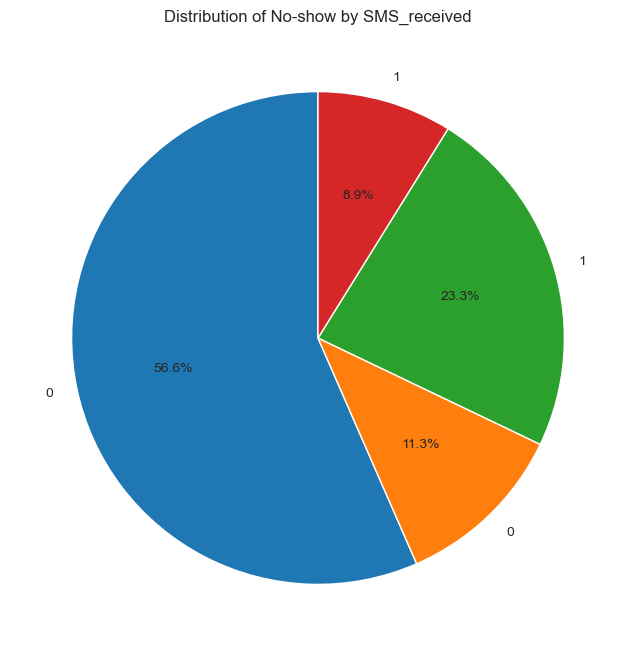

In [230]:
plt.figure(figsize=(8,8))
plt.pie(sms_noshow_df['counter'], labels=sms_noshow_df['SMS_received'], autopct='%1.1f%%',startangle=90)
plt.title('Distribution of No-show by SMS_received')
plt.show()

In [231]:
data_csv.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,0,1,0,0,0,No
1,M,0,0,0,0,0,No
2,F,0,0,0,0,0,No
3,F,0,0,0,0,0,No
4,F,0,1,1,0,0,No


In [232]:
noshow_predict=data_csv.groupby(['Gender','Hipertension','SMS_received','No-show']).size()
predict_df=noshow_predict.reset_index(name='counter')
print(predict_df)

   Gender  Hipertension  SMS_received No-show  counter
0       F             0             0      No    30830
1       F             0             0     Yes     6318
2       F             0             1      No    13734
3       F             0             1     Yes     5619
4       F             1             0      No     8934
5       F             1             0     Yes     1556
6       F             1             1      No     3748
7       F             1             1     Yes     1101
8       M             0             0      No    18976
9       M             0             0     Yes     3990
10      M             0             1      No     6639
11      M             0             1     Yes     2620
12      M             1             0      No     3770
13      M             1             0     Yes      671
14      M             1             1      No     1577
15      M             1             1     Yes      444


<Figure size 800x800 with 0 Axes>

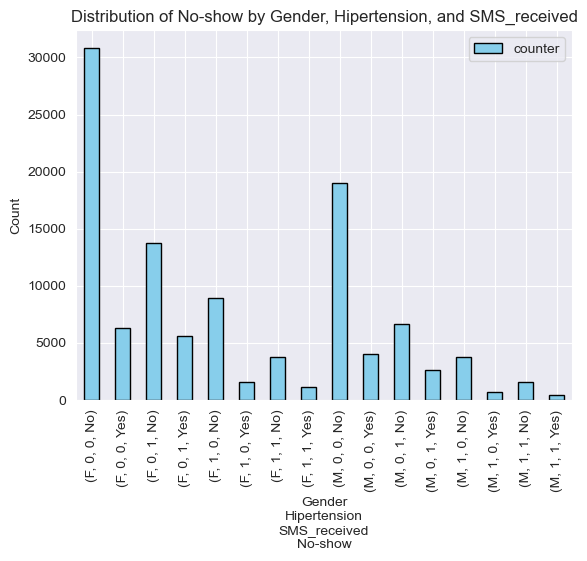

In [233]:
# Plotting as a grouped bar plot
plt.figure(figsize=(8, 8))
predict_df.pivot_table(index=['Gender', 'Hipertension', 'SMS_received', 'No-show'], values='counter', fill_value=0).plot(kind='bar', stacked=True, color='skyblue', edgecolor='black')
plt.title('Distribution of No-show by Gender, Hipertension, and SMS_received')
plt.xlabel('Gender\nHipertension\nSMS_received\nNo-show') 
plt.ylabel('Count')
plt.show()
